In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Dataset.csv')
print(df.isnull().sum())
df = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'enginelocation', 'enginetype'])
scaler = StandardScaler()
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'peakrpm', 'horsepower', 'citympg', 'highwaympg', 'price']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(df)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


,car_ID,symboling,CarName,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,carbody_wagon,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,1,3,alfa-romero giulia,rwd,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,four,...,False,True,False,True,False,False,False,False,False,False
1,2,3,alfa-romero stelvio,rwd,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,four,...,False,True,False,True,False,False,False,False,False,False
2,3,1,alfa-romero Quadrifoglio,rwd,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,six,...,False,True,False,False,False,False,False,False,True,False
3,4,2,audi 100 ls,fwd,0.173698,0.207256,0.136542,0.235942,-0.420797,four,...,False,True,False,False,False,False,True,False,False,False
4,5,2,audi 100ls,4wd,0.107110,0.207256,0.230001,0.235942,0.516807,five,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),rwd,1.721873,1.198549,1.398245,0.728239,0.763241,four,...,False,True,False,False,False,False,True,False,False,False
201,202,-1,volvo 144ea,rwd,1.721873,1.198549,1.351515,0.728239,0.949992,four,...,False,True,False,False,False,False,True,False,False,False
202,203,-1,volvo 244dl,rwd,1.721873,1.198549,1.398245,0.728239,0.878757,six,...,False,True,False,False,False,False,False,False,True,False
203,204,-1,volvo 246,rwd,1.721873,1.198549,1.398245,0.728239,1.273437,six,...,False,True,False,False,False,False,True,False,False,False


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
df = pd.read_csv('Dataset.csv')
print(df.isnull().sum())
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'peakrpm', 'horsepower', 'citympg', 'highwaympg', 'price']
categorical_features = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'enginelocation', 'enginetype']
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])
df_processed = preprocessor.fit_transform(df)
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)) # Get feature names after one-hot encoding
df_processed = pd.DataFrame(df_processed, columns=feature_names)
X = df_processed.drop('price', axis=1)
y = df_processed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(df_processed)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,peakrpm,horsepower,citympg,highwaympg,...,carbody_wagon,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,-0.262960,0.174483,-0.646553,-0.546059,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,-0.262960,0.174483,-0.646553,-0.546059,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-0.262960,1.264536,-0.953012,-0.691627,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,0.787855,-0.053668,-0.186865,-0.109354,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,0.787855,0.275883,-1.106241,-1.273900,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,0.577692,0.250533,-0.340094,-0.400490,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,0.367529,1.416637,-0.953012,-0.837195,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
202,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.787855,0.757535,-1.106241,-1.128332,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-0.683286,0.047732,0.119594,-0.546059,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.14277401904816436
R-squared: 0.8851383539165945


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.055567107204619756
R-squared: 0.9552962825858214


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.10275255469073809
R-squared: 0.917335607348338


In [54]:
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, r2_score
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.244733145557887
R-squared: 0.8031122739462448


In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_lr = regressor.predict(X_test) 
results = {
    'Linear Regression': {}, 
    'Decision Tree': {},
    'Random Forest': {},
    'Gradient Boosting': {},
    'Support Vector Regression': {}
}

results['Linear Regression']['MSE'] = mean_squared_error(y_test, y_pred_lr)
results['Linear Regression']['R-squared'] = r2_score(y_test, y_pred_lr)
results['Linear Regression']['MAE'] = mean_absolute_error(y_test, y_pred_lr)

results['Decision Tree']['MSE'] = mean_squared_error(y_test, y_pred)
results['Decision Tree']['R-squared'] = r2_score(y_test, y_pred)
results['Decision Tree']['MAE'] = mean_absolute_error(y_test, y_pred)

results['Random Forest']['MSE'] = mean_squared_error(y_test, y_pred)
results['Random Forest']['R-squared'] = r2_score(y_test, y_pred)
results['Random Forest']['MAE'] = mean_absolute_error(y_test, y_pred)

results['Gradient Boosting']['MSE'] = mean_squared_error(y_test, y_pred)
results['Gradient Boosting']['R-squared'] = r2_score(y_test, y_pred)
results['Gradient Boosting']['MAE'] = mean_absolute_error(y_test, y_pred)

results['Support Vector Regression']['MSE'] = mean_squared_error(y_test, y_pred)
results['Support Vector Regression']['R-squared'] = r2_score(y_test, y_pred)
results['Support Vector Regression']['MAE'] = mean_absolute_error(y_test, y_pred)
df_results = pd.DataFrame(results).T
display(df_results)

,MSE,R-squared,MAE
Linear Regression,0.258532,0.792011,0.346027
Decision Tree,0.244733,0.803112,0.334895
Random Forest,0.244733,0.803112,0.334895
Gradient Boosting,0.244733,0.803112,0.334895
Support Vector Regression,0.244733,0.803112,0.334895


In [58]:
importances = regressor.coef_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
display(feature_importance_df)

,Feature,Importance
22,enginelocation_rear,0.962249
29,enginetype_rotor,0.678802
24,enginetype_dohcv,0.478155
16,carbody_convertible,0.471319
5,enginesize,0.445025
4,curbweight,0.331184
2,carwidth,0.213302
0,wheelbase,0.175851
6,peakrpm,0.088132
3,carheight,0.070571


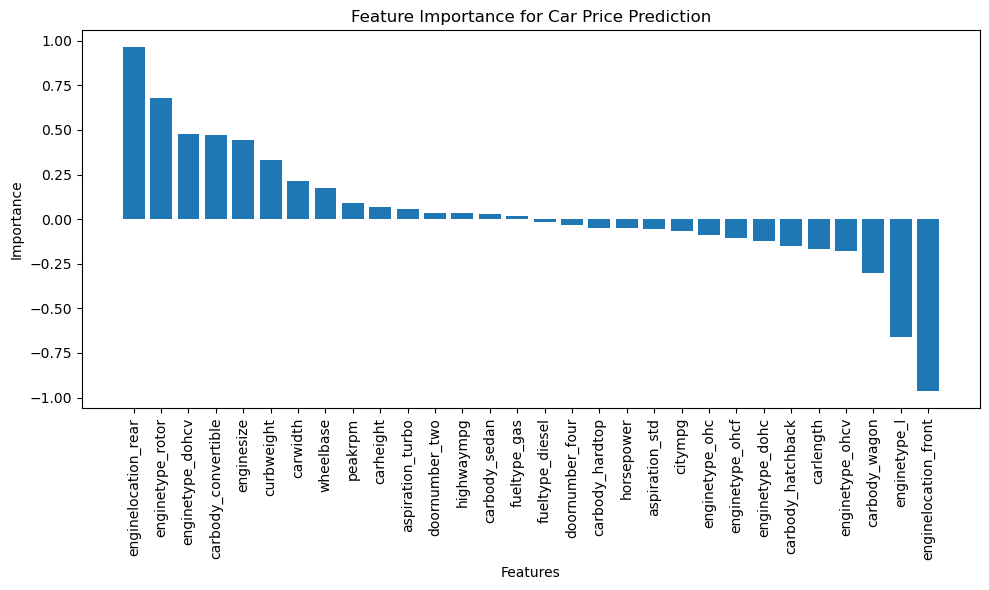

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance for Car Price Prediction")
plt.tight_layout()
plt.show()

In [62]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_three_features = feature_importance_df.head(3)['Feature'].tolist()
print("The top three most important features are:", top_three_features)

The top three most important features are: ['enginelocation_rear', 'enginetype_rotor', 'enginetype_dohcv']


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
regressor = GradientBoostingRegressor(random_state=42)  
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error') 
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"Tuned Mean Squared Error: {mse_tuned}")
print(f"Tuned R-squared: {r2_tuned}")

Tuned Mean Squared Error: 0.10536484689941593
Tuned R-squared: 0.9152340192222912
